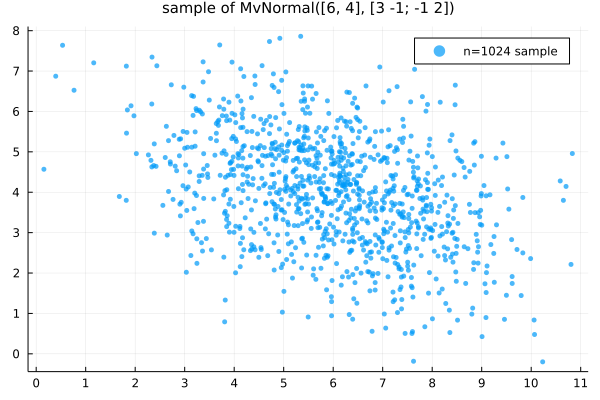

In [1]:
using LinearAlgebra
using Distributions
using StatsPlots

S = [
     3 -1
    -1  2
]

m = [
    6
    4
]

mvnormal0 = MvNormal(m, S)
n = 2^10
W = rand(mvnormal0, n)

scatter(W[1, :], W[2, :]; ms=3, msc=:auto, alpha=0.7, label="n=$n sample")
title!("sample of MvNormal($m, $S)"; titlefontsize=10)
plot!(; xtick=-100:100, ytick=-100:100)

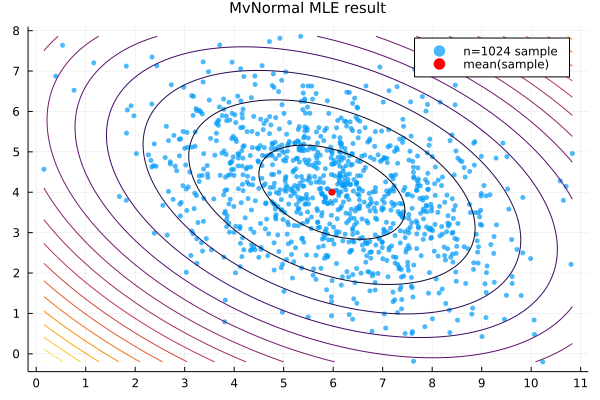

In [2]:
mvnormal = fit_mle(MvNormal, W)
f(x) = -2logpdf(mvnormal, x)

x = range(extrema(W[1, :])...; length=300)
y = range(extrema(W[2, :])...; length=300)
scatter(W[1, :], W[2, :]; ms=3, msc=:auto, alpha=0.7, label="n=$n sample")
scatter!((x->[x]).(mean(mvnormal))...; c=:red, msc=:auto, label="mean(sample)")
contour!(x, y, (x, y) -> f([x, y]); levels=2:2:100, colorbar=false)
title!("MvNormal MLE result"; titlefontsize=10)
plot!(; xtick=-100:100, ytick=-100:100)